In [50]:
# Keras introduction
#
# Train an MLP with MNIST dataset

# Reference:
# https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [51]:
import keras

In [52]:
# Data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
X_train.shape # training set size

(60000, 28, 28)

In [54]:
X_test.shape # test set size

(10000, 28, 28)

ylabel: 5


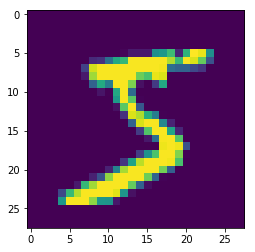

In [55]:
# plot an image
import matplotlib.pyplot as plt

image = X_train[0] # image
plt.imshow(image)
print('ylabel:', y_train[0]) # label

In [61]:
# MLP only receives vectors, so we flatten 28x28 to 784
X_train = X_train.reshape(60000, 784) # n_samples, 784
X_test = X_test.reshape(10000, 784) # n_samples, 784

# Convert element datatype to float32 because Tensorflow prefers it
# https://stackoverflow.com/questions/43406876/cant-use-float64-in-keras-with-tensorflow-backend
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# scale to between 0 and 1 because gradient descent is faster
# image pixel values range from 0 to 255
# (maybe try without this?)
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [62]:
# convert class vectors to categorical vectors
# 5 to [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
num_classes = 10 # 10 digits
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [63]:
# Training workflow
# 1. Define initial neural net
#    a. Setup Sequential model (pick layers, pooling, classifier)
#    b. compile model (pick optimiser, loss)
#
# 2. Setup monitoring (tensorboard) for learning curve - overfit, underfit
#    - tensorboard (plaidml)
#    - early stopping
#    - model checkpoint (auto save model)
#
# 3. Train
#     - fit()
#     - Unlike sklearn, fit is cumulative (continues progress if you
#       call repeatedly)
#
#     SKlearn:
#         model.fit()
#         model.fit() # most likely start from scratch (not resume)
#
#     Keras:
#         model.fit(epochs=100) 
#         model.fit(epochs=100) # resumes training from epoch 100
#
# 4. Update neural net (like step 1a, 1b)
# 5. Go to step 3


In [64]:
# Training workflow
# 1. Define initial neural net
#    a. Setup Sequential model (pick layers, pooling, classifier)
#    b. compile model (pick optimiser, loss)

# https://keras.io/getting-started/sequential-model-guide/
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary() # inspect model parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Dense: in * out + bias
# bias = out
784*512 + 512 + 512*10 + 10

407050

In [66]:
# b. compile model (pick optimiser, loss, metrics)
#
# https://keras.io/getting-started/sequential-model-guide/#compilation
# https://keras.io/optimizers/
# https://keras.io/losses/

model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# 2. Setup monitoring (tensorboard) for learning curve - overfit, underfit
#    - tensorboard (plaidml use matplotlib)
#    - early stopping
#    - model checkpoint (auto save model)

# Tensorboard side
# Run from anaconda prompt, from the current directory
# (mldds01) cd mldds-courseware/03_TextImage
# (mldds01) tensorboard --logdir=logs --host=0.0.0.0

# Keras
from keras.callbacks import TensorBoard
import time # to get unique timestamp for logs

# creates a subfolder for our training project (mnist_mlp)
# creates a timestamped folder each training session
# e.g. logs/mnist_mlp/1535166088
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())

In [71]:
# Advanced: custom callback
# https://keras.io/callbacks/

# class LossHistory(keras.callbacks.Callback):
#    def on_train_begin(self, logs={}):
#        self.losses = []

#    def on_batch_end(self, batch, logs={}):
#        self.losses.append(logs.get('loss2'))

# loss_history = LossHistory()

In [72]:
# 3. Train
#     - fit()
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    callbacks=[tensorboard], validation_split=.25)

# Some GPUs will run out of memory for large batch sizes
#
# GEMV error: reduce batch_size (64, 32, ...)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 6s 126us/step - loss: 0.2936 - acc: 0.9187 - val_loss: 0.2858 - val_acc: 0.9205
Epoch 2/10
45000/45000 [==============================] - 6s 128us/step - loss: 0.2852 - acc: 0.9208 - val_loss: 0.2797 - val_acc: 0.9225
Epoch 3/10
45000/45000 [==============================] - 6s 136us/step - loss: 0.2777 - acc: 0.9225 - val_loss: 0.2724 - val_acc: 0.9231
Epoch 4/10
45000/45000 [==============================] - 6s 123us/step - loss: 0.2706 - acc: 0.9248 - val_loss: 0.2671 - val_acc: 0.9249
Epoch 5/10
45000/45000 [==============================] - 6s 125us/step - loss: 0.2640 - acc: 0.9264 - val_loss: 0.2622 - val_acc: 0.9267
Epoch 6/10
45000/45000 [==============================] - 5s 122us/step - loss: 0.2580 - acc: 0.9281 - val_loss: 0.2566 - val_acc: 0.9283
Epoch 7/10
45000/45000 [==============================] - 6s 124us/step - loss: 0.2523 - acc: 0.9299 - val_loss: 0.2518 - 

[1.2227737064255608, 0.5944019526587592, 0.46653657539155746, 0.40998556911150613, 0.3765012309392293, 0.3531170623143514, 0.3354952345689138, 0.3212888664298587, 0.30933087985515595, 0.2990037900818719]


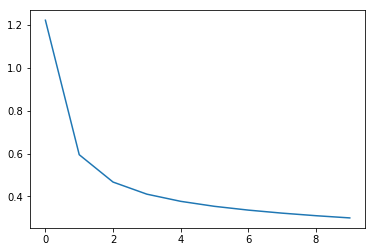

In [56]:
print(history.history['loss'])

plt.plot(history.history['loss'])

In [28]:
model.metrics_names

['loss', 'acc']

In [29]:
score = model.evaluate(X_test, y_test) # like sklearn's score
print(score)

10000/10000 [==============================] - 1s 100us/step
[0.2833544176340103, 0.922]


In [79]:
pred = model.predict_classes(X_test) # return classes

prob = model.predict(X_test) # returns probabilities

print('classes', pred, pred.shape)
print(prob.shape)
print('probabilities', prob)

# also probabilities because Sequential is a general keras model
# prob2 = model.predict_proba(X_test)
# print(prob2)

classes [7 2 1 ... 4 5 6] (10000,)
(10000, 10)
probabilities [[1.2510033e-04 3.0853192e-07 2.6768897e-04 ... 9.9693131e-01
  3.2851200e-05 7.9694088e-04]
 [1.7474052e-03 1.3598341e-04 9.6223491e-01 ... 5.3287046e-08
  2.1279543e-03 3.6829687e-07]
 [5.9518345e-05 9.7574019e-01 8.2809050e-03 ... 3.4405554e-03
  3.5712507e-03 5.2651012e-04]
 ...
 [9.8891792e-07 2.1192882e-06 2.8916935e-05 ... 1.5330531e-03
  6.2568905e-03 2.7574819e-02]
 [4.0193557e-04 7.4422470e-04 1.7318799e-04 ... 2.5269368e-05
  3.4752820e-02 3.9526454e-05]
 [9.9844670e-05 5.0947486e-09 7.3429313e-04 ... 4.2080792e-09
  1.8362721e-06 2.2983092e-07]]


In [83]:
print('truth', y_test[0])
print('prediction', pred[0])
print('probability', prob[0])

import numpy as np
print('predicted label', np.argmax(prob[0])) # get maximum value's index
print('truth label', np.argmax(y_test[0]))

truth [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
prediction 7
probability [1.2510033e-04 3.0853192e-07 2.6768897e-04 1.7600271e-03 4.0971740e-06
 8.1567057e-05 1.4816885e-07 9.9693131e-01 3.2851200e-05 7.9694088e-04]
predicted label 7
truth label 7


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

print('predicted labels', pred) # from model.predict_classes
print('truth labels', np.argmax(y_test, axis=1))

y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, pred))
print(confusion_matrix(y_true, pred))

predicted labels [7 2 1 ... 4 5 6]
truth labels [7 2 1 ... 4 5 6]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.94      0.92      0.93      1032
          3       0.92      0.94      0.93      1010
          4       0.93      0.95      0.94       982
          5       0.93      0.90      0.91       892
          6       0.94      0.96      0.95       958
          7       0.94      0.93      0.93      1028
          8       0.92      0.91      0.91       974
          9       0.92      0.91      0.92      1009

avg / total       0.94      0.94      0.94     10000

[[ 961    0    1    1    0    4    9    1    3    0]
 [   0 1113    2    2    0    1    4    2   11    0]
 [   6    4  948   13   11    4    9   12   21    4]
 [   0    1   15  947    0   18    2   10   12    5]
 [   1    1    4    0  931    0   11    2    4   28]
 [  10    2    4   31    4  80

In [91]:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dense(num_classes, activation='softmax'))

model.layers

In [95]:
model.layers[0]

7


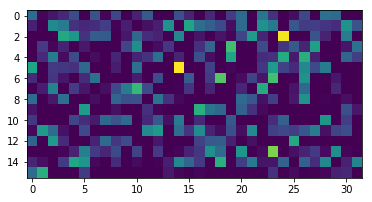

In [122]:
from keras.models import Model

# test input - first test image
data = X_test[0]
data = np.expand_dims(data, axis=0) # (784,) => (1, 784)

# intermediate model with input and first Dense layer only
int_model = Model(inputs=model.input,
                  outputs=model.layers[0].output)

output1 = int_model.predict(data)

output1 = output1.reshape(16, -1) # make it look like image
print(np.argmax(y_test[0])) # show original label
plt.imshow(output1) # show image

7


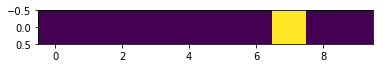

In [123]:
output2 = model.predict(data)

output2 = output2.reshape(1, -1) # make it look like image
print(np.argmax(y_test[0])) # show original label
plt.imshow(output2) # show image

In [120]:
# save model weights

model.save('mnist_mlp.h5') # HDF5 format

In [140]:
model.compile??

In [121]:
!dir *.h5

 Volume in drive D is Local Disk
 Volume Serial Number is 4A49-4F1A

 Directory of D:\mldds04\mldds-courseware\03_TextImage

05/09/2018  11:18 AM         3,277,872 mnist_mlp.h5
               1 File(s)      3,277,872 bytes
               0 Dir(s)  242,237,054,976 bytes free


In [ ]:
!ls *.h5 # mac

## Appendix - Regression model

In [129]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 2s 26us/step


In [134]:
print('number of training samples:', X_train.shape[0])
print('number of features:', X_train.shape[1])

number of training samples: 404
number of features: 13


In [161]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
# Training workflow
# 1. Define initial neural net
#    a. Setup Sequential model (pick layers, pooling, classifier)
#    b. compile model (pick optimiser, loss)
#
# 2. Setup monitoring (tensorboard) for learning curve - overfit, underfit
#
# 3. Train
#     - fit()
#
# 4. Update neural net (like step 1a, 1b)
# 5. Go to step 3

In [190]:
# 1. Define initial neural net
#    a. Setup Sequential model (pick layers, pooling, classifier)

num_features = 13 # X_train.shape[1]

model_reg = Sequential()
model_reg.add(Dense(64, activation='relu', input_shape=(num_features,)))
model_reg.add(Dense(1))
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [205]:
#    b. compile model (pick optimiser, loss)

from keras.optimizers import SGD

model_reg.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [206]:
# 2. Setup monitoring (tensorboard) for learning curve - overfit, underfit
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs/boston_mlp/%d' % time.time())
earlystop = EarlyStopping(patience=2)

model_reg.fit(X_train, y_train, batch_size=32, epochs=300,
              callbacks=[tensorboard, earlystop],
              validation_split=.20)


Train on 323 samples, validate on 81 samples
Epoch 1/300
323/323 [==============================] - 0s 467us/step - loss: 84.2212 - mean_squared_error: 84.2212 - val_loss: 88.4266 - val_mean_squared_error: 88.4266
Epoch 2/300
323/323 [==============================] - 0s 74us/step - loss: 84.1958 - mean_squared_error: 84.1958 - val_loss: 88.6624 - val_mean_squared_error: 88.6624
Epoch 3/300
323/323 [==============================] - 0s 50us/step - loss: 84.2264 - mean_squared_error: 84.2264 - val_loss: 88.9926 - val_mean_squared_error: 88.9926


In [207]:
model_reg.evaluate(X_test, y_test)

102/102 [==============================] - 0s 147us/step


[84.99111280254289, 84.99111280254289]

In [201]:
EarlyStopping?